In [197]:
import sklearn

In [198]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [199]:
import pandas as pd

In [200]:
x = pd.read_csv('Downloads/data/train.csv', index_col=0)

In [201]:
y = pd.read_csv('Downloads/data/target.csv', index_col=0)['radiant_won']

In [202]:
x = x.drop([col for col in x.columns if x[col].unique().shape[0] == 1], axis=1)

In [203]:
x['radiant_gold'] = x['r1_gold'] + x['r2_gold'] + x['r3_gold'] + x['r4_gold'] + x['r5_gold']
x['dire_gold'] = x['d1_gold'] + x['d2_gold'] + x['d3_gold'] + x['d4_gold'] + x['d5_gold']
x['gold_diff'] = x['radiant_gold'] - x['dire_gold']
x['dire_kda'] = x['d1_avg_kda'] + x['d2_avg_kda'] + x['d3_avg_kda'] + x['d4_avg_kda'] + x['d5_avg_kda']
x['radiant_kda'] = x['r1_avg_kda'] + x['r2_avg_kda'] + x['r3_avg_kda'] + x['r4_avg_kda'] + x['r5_avg_kda'] 
x['radiant_xp'] = x['r1_xp'] + x['r2_xp'] + x['r3_xp'] + x['r4_xp'] + x['r5_xp']
x['dire_xp'] = x['d1_xp'] + x['d2_xp'] + x['d3_xp'] + x['d4_xp'] + x['d5_xp']
x['radiant_kills'] = x['r1_kills'] + x['r2_kills'] + x['r3_kills'] + x['r4_kills'] + x['r5_kills']
x['dire_kills'] = x['d1_kills'] + x['d2_kills'] + x['d3_kills'] + x['d4_kills'] + x['d5_kills']
x['kills_diff'] = x['radiant_kills'] - x['dire_kills']
x['radiant_deaths'] = x['r1_deaths'] + x['r2_deaths'] + x['r3_deaths'] + x['r4_deaths'] + x['r5_deaths']
x['dire_deaths'] = x['d1_deaths'] + x['d2_deaths'] + x['d3_deaths'] + x['d4_deaths'] + x['d5_deaths']
x['deaths_diff'] = x['radiant_deaths'] - x['dire_deaths']
x['radiant_lh'] = x['r1_lh'] + x['r2_lh'] + x['r3_lh'] + x['r4_lh'] + x['r5_lh']
x['dire_lh'] = x['d1_lh'] + x['d2_lh'] + x['d3_lh'] + x['d4_lh'] + x['d5_lh']
x['radiant_role'] = x['r1_role'] + x['r2_role'] + x['r3_role'] + x['r4_role'] + x['r5_role'] 
x['dire_role'] = x['d1_role'] + x['d2_role'] + x['d3_role'] + x['d4_role'] + x['d5_role'] 
x['dire_kd'] = x['dire_kills'] - x['dire_deaths']
x['radiant_kd_diff'] = x['radiant_kills'] - x['radiant_deaths']
x['radiant_items'] = x['r1_items'] + x['r2_items'] + x['r3_items'] + x['r4_items'] + x['r5_items']
x['dire_items'] = x['d1_items'] + x['d2_items'] + x['d3_items'] + x['d4_items'] + x['d5_items']
x['r_avg_tower_damage_per_min'] = x['r1_avg_tower_damage_per_min'] + x['r2_avg_tower_damage_per_min'] + x['r3_avg_tower_damage_per_min'] + x['r4_avg_tower_damage_per_min'] + x['r5_avg_tower_damage_per_min']
x['d_avg_tower_damage_per_min'] = x['d1_avg_tower_damage_per_min'] + x['d2_avg_tower_damage_per_min'] + x['d3_avg_tower_damage_per_min'] + x['d4_avg_tower_damage_per_min'] + x['d5_avg_tower_damage_per_min']
x['tower_damage_diff'] = x['r_avg_tower_damage_per_min'] - x['d_avg_tower_damage_per_min']
x.drop(['radiant_rapier_count','dire_diffusal_blade_time','lobby_type','kills_diff'], axis=1, inplace=True)

In [204]:
y[:10]

fight_id
0     True
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9     True
Name: radiant_won, dtype: bool

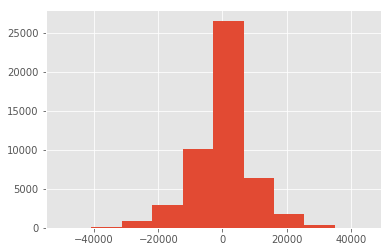

(49088, 368)

In [205]:
x['gold_diff'].hist()
plt.show()
x.shape

In [206]:
count_missings = x.isnull().sum()
x['radiant_kda'].mean()

18.956874816675324

In [207]:
kill_diff = pd.read_csv('Downloads/comp/kills.csv', index_col=0)


In [208]:
x = pd.concat([x,kill_diff], axis = 1)

In [209]:
missings_threshold = x.shape[0] / 2
drop_list = count_missings[count_missings > missings_threshold].index.tolist()
print(drop_list)
x.drop(drop_list, axis=1, inplace=True)

['radiant_bottle_time', 'radiant_courier_time', 'radiant_gem_time', 'radiant_ghost_time', 'radiant_travel_boots_time', 'radiant_hand_of_midas_time', 'radiant_mekansm_time', 'radiant_vladmir_time', 'radiant_pipe_time', 'radiant_urn_of_shadows_time', 'radiant_sheepstick_time', 'radiant_orchid_time', 'radiant_bloodthorn_time', 'radiant_echo_sabre_time', 'radiant_cyclone_time', 'radiant_force_staff_time', 'radiant_hurricane_pike_time', 'radiant_necronomicon_time', 'radiant_dagon_time', 'radiant_refresher_time', 'radiant_assault_time', 'radiant_black_king_bar_time', 'radiant_shivas_guard_time', 'radiant_bloodstone_time', 'radiant_sphere_time', 'radiant_lotus_orb_time', 'radiant_vanguard_time', 'radiant_crimson_guard_time', 'radiant_blade_mail_time', 'radiant_hood_of_defiance_time', 'radiant_rapier_time', 'radiant_monkey_king_bar_time', 'radiant_radiance_time', 'radiant_butterfly_time', 'radiant_greater_crit_time', 'radiant_basher_time', 'radiant_bfury_time', 'radiant_manta_time', 'radiant_l

In [210]:
import json
with open('C:\\Users\\davem\\Downloads\\comp\\competition_data_v2\\dictionaries/heroes.json') as f:
    heroes = json.load(f)
heroes = pd.DataFrame(heroes).T
heroes

,agi_gain,attack_range,attack_rate,attack_type,base_agi,base_armor,base_attack_max,base_attack_min,base_health,base_health_regen,...,int_gain,legs,localized_name,move_speed,name,primary_attr,projectile_speed,roles,str_gain,turn_rate
1,2.8,150,1.45,Melee,22,-1,31,27,200,1.5,...,1.8,2,Anti-Mage,310,npc_dota_hero_antimage,agi,0,"[Carry, Escape, Nuker]",1.3,0.5
10,3.7,350,1.5,Ranged,24,-2,18,9,200,1.5,...,1.1,0,Morphling,280,npc_dota_hero_morphling,agi,1300,"[Carry, Escape, Durable, Nuker, Disabler]",2.3,0.6
100,2.1,150,1.7,Melee,23,0,31,27,200,1.5,...,1.7,2,Tusk,300,npc_dota_hero_tusk,str,900,"[Initiator, Disabler, Nuker]",2.6,0.7
101,0.8,600,1.7,Ranged,13,-2,22,12,200,1.5,...,3.6,2,Skywrath Mage,330,npc_dota_hero_skywrath_mage,int,1000,"[Support, Nuker, Disabler]",1.8,0.5
102,1.5,150,1.7,Melee,17,-1,42,32,200,1.5,...,2,2,Abaddon,310,npc_dota_hero_abaddon,str,900,"[Support, Carry, Durable]",2.6,0.5
103,1.8,150,1.7,Melee,14,1,33,23,200,1.5,...,1.6,2,Elder Titan,315,npc_dota_hero_elder_titan,str,900,"[Initiator, Disabler, Nuker, Durable]",2.6,0.5
104,1.7,150,1.7,Melee,18,0,39,35,200,1.5,...,2.2,2,Legion Commander,320,npc_dota_hero_legion_commander,str,900,"[Carry, Disabler, Initiator, Durable, Nuker]",2.9,0.5
105,1.3,700,1.7,Ranged,14,5,9,7,200,1.5,...,2.9,6,Techies,270,npc_dota_hero_techies,int,900,"[Nuker, Disabler]",2.3,0.5
106,1.8,150,1.7,Melee,22,-2,34,30,200,2,...,1.8,2,Ember Spirit,305,npc_dota_hero_ember_spirit,agi,900,"[Carry, Escape, Nuker, Disabler, Initiator]",2.1,0.5
107,1.5,150,1.7,Melee,17,1,35,25,200,1.5,...,2.1,2,Earth Spirit,290,npc_dota_hero_earth_spirit,str,900,"[Nuker, Escape, Disabler, Initiator, Durable]",3.2,0.6


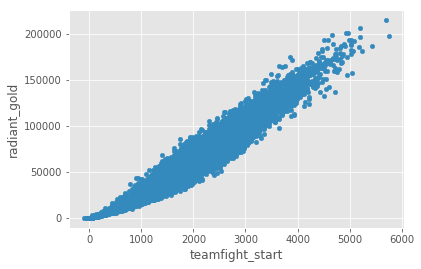

In [211]:
x.plot(kind='scatter',x='teamfight_start',y='radiant_gold')

In [212]:
from sklearn.model_selection import train_test_split

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=.33, random_state=1)

In [213]:
x_train = x_train.fillna(0)
x_validation = x_validation.fillna(0)

In [214]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_validation = scaler.fit_transform(x_validation)

In [253]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(max_depth=4,learning_rate=0.09, n_estimators=120)
clf.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.09, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=120,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [254]:
from sklearn.metrics import accuracy_score

print('Train Accuracy:', accuracy_score(y_train, clf.predict(x_train)))
print('Validation Accuracy:', accuracy_score(y_validation, clf.predict(x_validation)))

Train Accuracy: 0.7614023351982486
Validation Accuracy: 0.7408641975308642


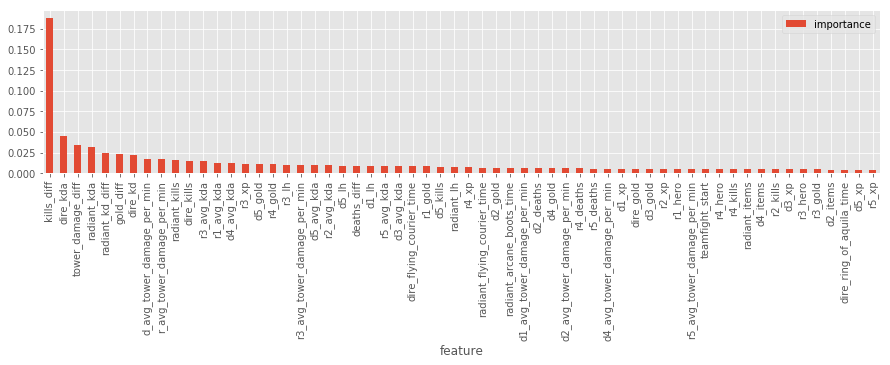

,importance
feature,
kills_diff,0.188110
dire_kda,0.045479
tower_damage_diff,0.034326
radiant_kda,0.031502
radiant_kd_diff,0.024203
gold_diff,0.023270
dire_kd,0.022470
d_avg_tower_damage_per_min,0.017918
r_avg_tower_damage_per_min,0.016768


In [232]:
if hasattr(clf, 'coef_'):
    df_importances = sorted(list(zip(x.columns, clf.coef_.ravel())), key=lambda tpl: tpl[1], reverse=True)
else:
    df_importances= sorted(list(zip(x.columns, clf.feature_importances_.ravel())), key=lambda tpl: tpl[1], reverse=True)
df_importances = df_importances[:60]
df_importances = pd.DataFrame(df_importances, columns=['feature', 'importance'])
df_importances = df_importances.set_index('feature')
df_importances.plot(kind='bar', figsize=(15, 3))
plt.show()
display(df_importances.head(10))

In [233]:
x_test = pd.read_csv('Downloads/data/test.csv', index_col=0)
y_submission = pd.read_csv('Downloads/data/submission.csv', index_col=0)

In [234]:
kill_diff_test = pd.read_csv('Downloads/comp/kills_test.csv', index_col=0)

In [235]:
x_test = pd.concat([x_test, kill_diff_test], axis=1)

In [236]:
x_test['radiant_gold'] = x_test['r1_gold'] + x_test['r2_gold'] + x_test['r3_gold'] + x_test['r4_gold'] + x_test['r5_gold']
x_test['dire_gold'] = x_test['d1_gold'] + x_test['d2_gold'] + x_test['d3_gold'] + x_test['d4_gold'] + x_test['d5_gold']
x_test['gold_diff'] = x_test['radiant_gold'] - x_test['dire_gold']
x_test['dire_kda'] = x_test['d1_avg_kda'] + x_test['d2_avg_kda'] + x_test['d3_avg_kda'] + x_test['d4_avg_kda'] + x_test['d5_avg_kda']
x_test['radiant_kda'] = x_test['r1_avg_kda'] + x_test['r2_avg_kda'] + x_test['r3_avg_kda'] + x_test['r4_avg_kda'] + x_test['r5_avg_kda'] 
x_test['radiant_xp'] = x_test['r1_xp'] + x_test['r2_xp'] + x_test['r3_xp'] + x_test['r4_xp'] + x_test['r5_xp']
x_test['dire_xp'] = x_test['d1_xp'] + x_test['d2_xp'] + x_test['d3_xp'] + x_test['d4_xp'] + x_test['d5_xp']
x_test['radiant_kills'] = x_test['r1_kills'] + x_test['r2_kills'] + x_test['r3_kills'] + x_test['r4_kills'] + x_test['r5_kills']
x_test['dire_kills'] = x_test['d1_kills'] + x_test['d2_kills'] + x_test['d3_kills'] + x_test['d4_kills'] + x_test['d5_kills']
x_test['kills_diff'] = x_test['radiant_kills'] - x_test['dire_kills']
x_test['radiant_deaths'] = x_test['r1_deaths'] + x_test['r2_deaths'] + x_test['r3_deaths'] + x_test['r4_deaths'] + x_test['r5_deaths']
x_test['dire_deaths'] = x_test['d1_deaths'] + x_test['d2_deaths'] + x_test['d3_deaths'] + x_test['d4_deaths'] + x_test['d5_deaths']
x_test['deaths_diff'] = x_test['radiant_deaths'] - x_test['dire_deaths']
x_test['radiant_lh'] = x_test['r1_lh'] + x_test['r2_lh'] + x_test['r3_lh'] + x_test['r4_lh'] + x_test['r5_lh']
x_test['dire_lh'] = x_test['d1_lh'] + x_test['d2_lh'] + x_test['d3_lh'] + x_test['d4_lh'] + x_test['d5_lh']
x_test['radiant_role'] = x_test['r1_role'] + x_test['r2_role'] + x_test['r3_role'] + x_test['r4_role'] + x_test['r5_role'] 
x_test['dire_role'] = x_test['d1_role'] + x_test['d2_role'] + x_test['d3_role'] + x_test['d4_role'] + x_test['d5_role'] 
x_test['dire_kd'] = x_test['dire_kills'] - x_test['dire_deaths']
x_test['radiant_kd_diff'] = x_test['radiant_kills'] - x_test['radiant_deaths']
x_test['radiant_items'] = x_test['r1_items'] + x_test['r2_items'] + x_test['r3_items'] + x_test['r4_items'] + x_test['r5_items']
x_test['dire_items'] = x_test['d1_items'] + x_test['d2_items'] + x_test['d3_items'] + x_test['d4_items'] + x_test['d5_items']
x_test['r_avg_tower_damage_per_min'] = x_test['r1_avg_tower_damage_per_min'] + x_test['r2_avg_tower_damage_per_min'] + x_test['r3_avg_tower_damage_per_min'] + x_test['r4_avg_tower_damage_per_min'] + x_test['r5_avg_tower_damage_per_min']
x_test['d_avg_tower_damage_per_min'] = x_test['d1_avg_tower_damage_per_min'] + x_test['d2_avg_tower_damage_per_min'] + x_test['d3_avg_tower_damage_per_min'] + x_test['d4_avg_tower_damage_per_min'] + x_test['d5_avg_tower_damage_per_min']
x_test['tower_damage_diff'] = x_test['r_avg_tower_damage_per_min'] - x_test['d_avg_tower_damage_per_min']
x_test.drop(['radiant_rapier_count','dire_diffusal_blade_time','lobby_type'], axis=1, inplace=True)

In [237]:
x_test = x_test.fillna(0)

In [238]:
features = list(x.columns)
x_test = x_test[features]

In [239]:
scaler = StandardScaler()
x_test = scaler.fit_transform(x_test)

In [240]:
y_submission['radiant_won'] = clf.predict(x_test)

In [241]:
y_submission.head()

,radiant_won
fight_id,
49088,False
49089,True
49090,True
49091,False
49092,True


In [242]:
import time
import os

current_timestamp = int(time.time())
submission_path = 'submissions/{}.csv'.format(current_timestamp)

if not os.path.exists('submissions'):
    os.makedirs('submissions')

print(submission_path)
y_submission.to_csv(submission_path, index=True)

submissions/1523359274.csv
